<a href="https://colab.research.google.com/github/DestinyHowell/sciware15-git-intro/blob/main/Copy_of_DeepNetworksandVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Neural Networks and Vision

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import ipywidgets as widgets
import torchvision.transforms as transforms

Execute the next cell to download and process the data. It takes a few minutes so do this first.

In [2]:
import requests
import io

response = requests.get('https://osf.io/wh3nb/download')
IT_resps = np.load(io.BytesIO(response.content)).reshape((7*7, 40, 168))  

response = requests.get('https://osf.io/wcdsa/download')
V4_resps = np.load(io.BytesIO(response.content)).reshape((7*7, 40, 128))  

response = requests.get('https://osf.io/t2jqc/download')
images = np.load(io.BytesIO(response.content)).astype('float64').reshape((7*7, 40, 256, 256, 3))

images = np.moveaxis(images, 4, 2)

We will be looking at neural data from https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003963

The authors presented images to monkeys while recording from areas V4 and IT.

**Images:** They presented images from 7 different categories (Animals, Cars, Chairs, Faces, Fruits, Planes, and Tables). In each category, they had 7 separate objects. They created 40 configurations of each object, showing it on top of different backgrounds and in different sizes, shapes, and rotations. They presented each of these 1960 images (7 categories x 7 objects x 40 configurations) around 40 times. 

You can see 5 examples for 4 of the 7 objects in the Animals category by executing the next cell. 

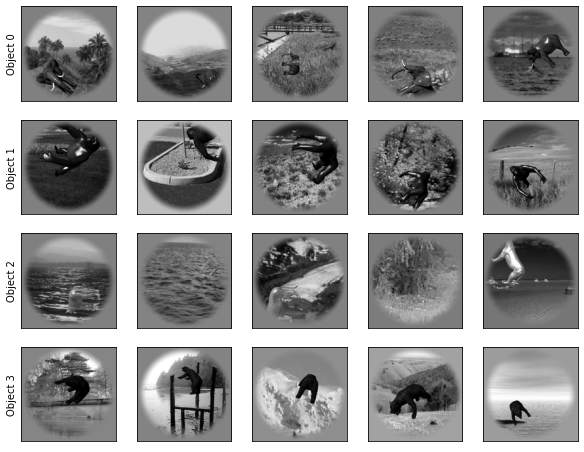

In [3]:
# @markdown Execute to visualize images
fig, axes = plt.subplots(4, 5, figsize = (10, 8))

for i_row in range(4):
  for i_col in range(5):
    axes[i_row][i_col].imshow(images[i_row, i_col, 0, :, :], cmap = 'gray')
    axes[i_row][i_col].set(xticks = [], yticks = [])
  axes[i_row][0].set(ylabel = f'Object {i_row}')

**Neural activity**: While presenting the above images, the authors recorded 168 cells from area IT and 128 cells from area V4. For each image, they summed the spiking responses of each neuron from 70 to 170 ms after the image presentation to get a response per neuron per image.  Note this removes any temporal information. They also normalized these values so don't be alarmed if you see negative values for neural responses.

Execute the following cell to visualize an example neuron's responses to the 1960 images.

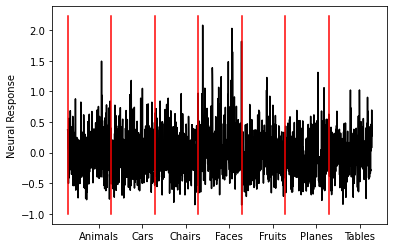

In [4]:
# @markdown Execute to see example neural responses

categories = np.array(['Animals', 'Cars', 'Chairs', 'Faces', 'Fruits', 'Planes', 'Tables'])

fig, ax = plt.subplots(1, 1)

ax.plot(IT_resps[:, :, 1].reshape((-1,)), 'k')
ylim = ax.get_ylim()
for i in range(0, 1900, 7*40):
  ax.plot([i, i], ylim, 'r')

ax.set(xticks = np.arange(200, 1960, 7*40),
       xticklabels = categories,
       ylabel = 'Neural Response');

## Section 1: Neural responses

### Exercise 1: RDM for area IT 

Let's look at how the different objects and categories are represented in area IT by constructing a representational dissimilarity matrix (RDM). The data is already ordered by category: the first seven rows are the animal images, the next seven are the car images, and so on.

`IT_resps` is a 49 x 40 x 168 array. The first dimension is the object (7 categories x 7 objects per category = 49). The data is already ordered by category: the first seven rows are the animal images, the next seven are the car images, and so on. The second dimension is the 40 different configurations per category. And the third dimension corresponds to the 168 area IT neurons. 

**Step 1)** First, average the neural responses over the 40 different configurations of each object. What size array should you have? 

**Step 2)** Compute the representational dissimilarity matrix for this data and store it in a variable called `rdm`. This should be a 49 x 49 matrix where each entry equals 1 minus the correlation of the neural responses to two images (the image represented by the row number and the image represented by the column number). So the entry at row 4, column 8 is 1 minus the correlation of the responses to images 4 and 8.

*Hint 1:* No need to vectorize this - looping over rows and columns is useful

*Hint 2:* To compute the correlation coefficient between two numpy arrays, use np.corrcoef as follows:

```
example_x = np.random.randn(200,)
example_y = np.random.randn(200,)
np.corrcoef(example_x, example_y)[0, 1]
```

**Step 3)** Visualize the RDM. What sort of plot should you use? Try to label the different categories on the x axis and y axis. The ordering of categoies is in the variable `categories`

*Hint 1:* You will need to set the ticks first (`ax.set(xticks=...)`) and then change what the labels of thos ticks should be (`ax.set_xticklabels(...)`)



(49, 168)


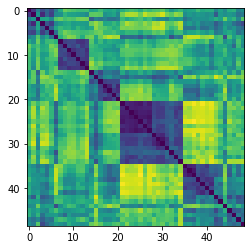

In [13]:
# Compute RDM for IT responses

# Step 1) Average over 40 configs per object
averaged_IT_resps = np.mean(IT_resps, axis = 1)
print(averaged_IT_resps.shape)
# Step 2) Compute RDM
rdm=np.zeros((49,49))
for r in range(rdm.shape[0]):
  for c in range(rdm.shape[1]):
    rdm[r,c] = 1 - np.corrcoef(averaged_IT_resps[r,:], averaged_IT_resps[c,:])[0,1]
# Step 3) Visualize your RDM
plt.imshow(rdm)

In [12]:
rdm[1]

array([2.89551348e-01, 1.11022302e-16, 9.01358901e-01, 2.01663442e-01,
       5.54530703e-01, 3.32284771e-01, 8.41377214e-01, 8.74297381e-01,
       1.12213989e+00, 1.00438876e+00, 9.86372651e-01, 9.50534382e-01,
       9.01665351e-01, 8.22534804e-01, 1.29184710e+00, 1.29772976e+00,
       1.27299960e+00, 8.73928899e-01, 9.44220941e-01, 1.00860316e+00,
       7.94898870e-01, 1.34774929e+00, 1.50156863e+00, 1.51772631e+00,
       1.49943278e+00, 1.33381386e+00, 1.56212293e+00, 1.45015839e+00,
       1.44385395e+00, 1.49557583e+00, 1.60953198e+00, 1.36906709e+00,
       1.28257689e+00, 1.43565283e+00, 1.37621363e+00, 8.36004563e-01,
       9.37873651e-01, 8.71770141e-01, 9.48354823e-01, 9.07969446e-01,
       8.49920437e-01, 8.88615769e-01, 4.96426033e-01, 9.33223910e-01,
       8.54953945e-01, 9.16358217e-01, 8.66704486e-01, 6.46826121e-01,
       7.17455918e-01])

In [ ]:
# @markdown Click here for the solution

# Step 1) Average over 40 configs per object
averaged_IT = np.mean(IT_resps, axis=1)

# Step 2) Compute RDM
rdm = np.zeros((49, 49))

for i_row in range(rdm.shape[0]):
  for i_col in range(rdm.shape[1]):
    rdm[i_row, i_col] = 1 - np.corrcoef(averaged_IT[i_row, :], averaged_IT[i_col, :])[0, 1]

# Step 3) Visualize rdm
fig, ax = plt.subplots(1, 1)
im = ax.imshow(rdm, cmap = 'jet')
for i_cat in range(0, 49, 7):
  ax.plot([i_cat, i_cat], [0, 49], 'k')
  ax.plot([0, 49], [i_cat, i_cat], 'k')
ax.set(xticks = np.arange(4, 49, 7))
ax.set_xticklabels(categories, rotation = 45, ha="right")
ax.set(yticks = np.arange(4, 49, 7))
ax.set_yticklabels(categories, rotation = 45, ha="right")
ax.set(xlim = [0, 49], ylim = [49, 0])

plt.colorbar(im)

### Exercise 2: Interpreting RDMs 

In the cell below, you can see the RDMs for the V4 neural responses and the IT neural responses.

Discuss the following questions:

A) Within a category, does the population of IT neurons often respond similarly for different objects? What category is this especially true of? What does this tell you about the type of coding in area IT, e.g. the complexity of the features encoded?

B) How does the V4 RDM differ from the IT RDM? What does this tell you about V4 processing as compared to IT processing?)**

C) If you recorded from V1 neurons and constructed an RDM, what would you expect it to look like?




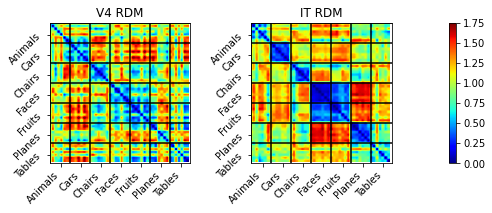

In [14]:
# @markdown Execute to visualize RDMs for area IT and V4
from scipy.stats import zscore

def compute_RDM(resp):
  """Compute the representational dissimilarity matrix (RDM)
  Args:
    resp (ndarray): S x N matrix with population responses to
      each stimulus in each row
  Returns:
    ndarray: S x S representational dissimilarity matrix
  """

  # z-score responses to each stimulus
  zresp = zscore(resp, axis=1)

  # Compute RDM
  RDM = 1 - (zresp @ zresp.T) / zresp.shape[1]

  return RDM

V4_rdm = compute_RDM(np.mean(V4_resps, axis = 1))
IT_rdm = compute_RDM(np.mean(IT_resps, axis = 1))

fig, (ax, ax2, cax) = plt.subplots(ncols=3,figsize=(7,3), 
                  gridspec_kw={"width_ratios":[1,1, 0.05]})
fig.subplots_adjust(wspace=0.3)
im = ax.imshow(V4_rdm, vmin = 0, vmax = 1.75, cmap = 'jet')
for i_cat in range(0, 49, 7):
  ax.plot([i_cat, i_cat], [0, 49], 'k')
  ax.plot([0, 49], [i_cat, i_cat], 'k')
ax.set(xticks = np.arange(4, 49, 7))
ax.set_xticklabels(categories, rotation = 45, ha="right")
ax.set(yticks = np.arange(4, 49, 7))
ax.set_yticklabels(categories, rotation = 45, ha="right")
ax.set(xlim = [0, 49], ylim = [49, 0])
ax.set(title = 'V4 RDM')

im = ax2.imshow(IT_rdm, vmin = 0, vmax = 1.75, cmap = 'jet')
for i_cat in range(0, 49, 7):
  ax2.plot([i_cat, i_cat], [0, 49], 'k')
  ax2.plot([0, 49], [i_cat, i_cat], 'k')
ax2.set(xticks = np.arange(4, 49, 7))
ax2.set_xticklabels(categories, rotation = 45, ha="right")
ax2.set(yticks = np.arange(4, 49, 7))
ax2.set_yticklabels(categories, rotation = 45, ha="right")
ax2.set(xlim = [0, 49], ylim = [49, 0])
ax2.set(title = 'IT RDM')
fig.colorbar(im, cax=cax)

plt.tight_layout()

In [ ]:
# @markdown Click here for the solution
"""
A) Yes, the diagonal blocks that represent the same category en dark blue for area IT, 
meaning the responses are similar for different objects in the same category. 
This is especially true of faces. This shows that the IT neurons are not responding 
to low-level features such as edges or orientations, because those would differ a 
lot for different objects (and configurations) even in the same category. Instead, 
area IT is representing more high-level information about object identity.

B) The V4 RDM has much less block-like structure. Let's take the diagonal blocks - 
those are not as fully blue as in the IT RDM. This means that the neural responses 
to objects in the same category are not as uniformly similar. There is much less 
category-level grouping in the responses. This shows that V4 is responding to 
lower-level features and not high-level category representation.

C) I'd expect a V1 RDM to be even less structured than a V4 neurons - with very 
little discernable structure. V1 neurons respond to edges and these would be 
different even for the configurations of an object that we've already averaged 
over, let alone different objects in the same category.
""";


## Section 2: Convolutional neural network

We will examine a convolutional neural network, specifically AlexNet, a network that was state-of-the-art at object recognition in 2012. Execute the following cell to load in our model, AlexNet. It consists of 5 convolutional layers followed by 2 feedforward layers, followed by the output layer (see schematic [here](https://www.researchgate.net/profile/Alexander-Khvostikov/publication/322592079/figure/fig3/AS:584350454263818@1516331413967/AlexNet-architecture-Includes-5-convolutional-layers-and-3-fullyconnected-layers.png)). We have loaded in the learned weights and architecture.

In [15]:
# Execute this cell to load in AlexNet model

import torch
import torch.nn as nn
from torchvision import models

model_orig = models.alexnet(pretrained=True)

class AlexNet(nn.Module):
    def __init__(self):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            *list(model_orig.features.children())
        )
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = nn.Sequential(
            *list(model_orig.classifier.children())
        )
    def forward(self, x):
        activations = {}
        conv_features = [2, 5, 7, 9, 12]
        for i_feature in range(len(model_orig.features)):
            x = self.features[i_feature](x)
            if i_feature in conv_features:
              activations[f'conv.{conv_features.index(i_feature)}'] = x

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        classifier_features = [2, 5]
        for i_classifier in range(len(model_orig.classifier)):
            x = self.classifier[i_classifier](x)
            if i_feature in classifier_features:
              activations[f'feedforward.{classifier_features.index(i_feature)}'] = x

        return x, activations

model = AlexNet()
model.eval()

model


/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

We can push our images through the model and record the unit activations. Let's push 100 images through below.


We end up with a dictionary `CNN_acts`. To get the activations of the first layer to the 100 images, you can use `CNN_acts['conv.0']`. This is an array of size (100, 64, 27, 27). We have 64 x 27 x 27 = 46656 units responding to 100 images. For those more familiar with convolutions, this corresponds to 64 different convolutional filters, and 27 x 27 units per filter.

To get the activations of the second layer you can use `CNN_acts['conv.1']`, and so on.

In [16]:
# Normalize the images for the deep network
reshaped_images = images.reshape((7*7*40, 3, 256, 256))/255.
reshaped_images = reshaped_images[:, :, 15:-15, 15:-15]

normalize = transforms.Normalize(mean=[0.44, 0.44, 0.44],
                                 std=[0.18, 0.18, 0.18])

tensor_images = torch.tensor(reshaped_images).float()

tensor_images = normalize(tensor_images)


# Push images through model
outputs, CNN_acts = model(tensor_images[:100])

print(CNN_acts['conv.0'].shape)

torch.Size([100, 64, 27, 27])


We'll load in the responses for all 1960 images below. It requires some ugly code to avoid running out of memory (and will take a few minutes).

In [17]:
for i_image in range(0, 1960, 196):
  
  outputs, these_CNN_acts = model(tensor_images[i_image:i_image + 196])

  if i_image == 0:
    CNN_acts = these_CNN_acts
    for k in CNN_acts.keys():
      CNN_acts[k] = CNN_acts[k].detach().numpy()
  else:
     for k in CNN_acts.keys():
         CNN_acts[k] = np.concatenate((CNN_acts[k], these_CNN_acts[k].detach().numpy()), axis = 0)

In [19]:
print(CNN_acts['conv.0'].shape)

(1960, 64, 27, 27)


### Exercise 3: RDMs of CNN activations 

Let's compute and plot the RDMs of each of our CNN convolutional layers and for Area IT.

A) **(Optional, advanced, if there's time)** Compute and visualize the RDM for the 4th layer of the conv net yourself. Then (even more optional), do it for all of the convolutional layers, 0 through 4!

If you don't complete A, you can run the solution to answer the following questions:

B) Which convolutional layer's representations most resemble those in area IT?

C) What would you conclude about visual processing in AlexNet vs primate brains? Why?


In [ ]:
# @markdown Click here for solution

# Compute RDM for each convolutional layer
conv_rdms = {}
for i_layer in range(5):

  this_layer_acts = np.mean(CNN_acts[f'conv.{i_layer}'].reshape((7, 7, 40, -1)), axis = 2).reshape((7*7, -1))
  conv_rdms[i_layer] = compute_RDM(this_layer_acts)

# Visualize all RDMS
fig, axes = plt.subplots(1, 7, figsize = (15, 10), sharey = True)

for i_layer in range(5):

    axes[i_layer].imshow(conv_rdms[i_layer], cmap = 'jet')
    for i_cat in range(0, 49, 7):
      axes[i_layer].plot([i_cat, i_cat], [0, 49], 'k')
      axes[i_layer].plot([0, 49], [i_cat, i_cat], 'k')
    axes[i_layer].set(xticks = np.arange(4, 49, 7))
    axes[i_layer].set_xticklabels(categories, rotation = 45, ha="right")
    axes[i_layer].set(yticks = np.arange(4, 49, 7))
    axes[i_layer].set_yticklabels(categories, rotation = 45, ha="right")
    axes[i_layer].set(xlim = [0, 49], ylim = [49, 0])
    axes[i_layer].set(title = f'Conv layer {i_layer}')

i_layer = 5
axes[i_layer].imshow(V4_rdm, cmap = 'jet')
for i_cat in range(0, 49, 7):
  axes[i_layer].plot([i_cat, i_cat], [0, 49], 'k')
  axes[i_layer].plot([0, 49], [i_cat, i_cat], 'k')
axes[i_layer].set(xticks = np.arange(4, 49, 7))
axes[i_layer].set_xticklabels(categories, rotation = 45, ha="right")
axes[i_layer].set(yticks = np.arange(4, 49, 7))
axes[i_layer].set_yticklabels(categories, rotation = 45, ha="right")
axes[i_layer].set(xlim = [0, 49], ylim = [49, 0])
axes[i_layer].set(title = f'Area V4');

i_layer = 6
axes[i_layer].imshow(IT_rdm, cmap = 'jet')
for i_cat in range(0, 49, 7):
  axes[i_layer].plot([i_cat, i_cat], [0, 49], 'k')
  axes[i_layer].plot([0, 49], [i_cat, i_cat], 'k')
axes[i_layer].set(xticks = np.arange(4, 49, 7))
axes[i_layer].set_xticklabels(categories, rotation = 45, ha="right")
axes[i_layer].set(yticks = np.arange(4, 49, 7))
axes[i_layer].set_yticklabels(categories, rotation = 45, ha="right")
axes[i_layer].set(xlim = [0, 49], ylim = [49, 0])
axes[i_layer].set(title = f'Area IT');


Your answer here

In [ ]:
# @markdown Click here for B/C solutions

"""
B) The fourth convolutional layer most resembles area IT - it has the most block
like structure, especially in the diagonal blocks. I think these two RDMs look 
pretty similar.

C) There seems to be a similar representation of information in higher level 
layers of AlexNet and in higher level areas of the visual system, area IT. This
indicates a similarity between the visual information processing in artificial 
and biological neural networks.
""";


### Exercise 4: Examining the convolutional filters of the first layer 

In each convolutional layer of AlexNet, we have multiple convolutional filters (64). In the example above, imagine that we have 3 convolutional filters - this would make the convolutional layer size (3 x 2 x 2) instead of (2 x 2). Let's look at the learned convolutional filters in the first layer of AlexNet.



In [18]:
# Get the network weights for the first convolutional layer
filters = model.features[0].weight.data.numpy()

# Normalize for plotting
filters = filters - np.min(filters)
filters = filters / np.max(filters)
                           

**Optional, advanced**: Code this visualization yourself! Plot all 64 filters. 

Hint 1: `imshow` expects colored images to be number of pixels by number of pixels by 3. `np.swapaxes` may be helpful

If you don't code this yourself, execute the next cell to see the plot


What types of neurons do you see? Do they resemble any of the receptive fields you're familiar with (center-surround, simple cells, complex cells)? What do the similarities hint at about biological visual processing vs artifical network visual processing?

In [ ]:
# @markdown Click here to plot filters
# Plot the filters
fig, axes = plt.subplots(8, 8, figsize = (8, 8), sharex = True, sharey = True)
axes = axes.flatten()
for i_ax in range(64):
  axes[i_ax].imshow(np.swapaxes(filters[i_ax], 0, 2))
  axes[i_ax].axis('Off')

### (Optional, very advanced) Exercise 5) Predicting neural responses

Try predicting the neural responses from the convolutional activations using linear regression. Which layer best predicts the IT responses? The V4 responses?

Hint: Use PLS_regression from sklearn. This is similar to linear regression but will work slightly better with limited data.

Hint 2: Separate train vs test images in a smart way. Instead of completely randomly, use 90% of the 40 configurations for each category and object for training data.